# TASK 1 OIB-SIP  "IRIS FLOWER CLASSIFICATION"

* KOLLI. SRI LAKSHMI
* Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

In [2]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
#loading the dataset
df=pd.read_csv("/home/sri/Downloads/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 6)

In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
# Transforming Iris types into numeric values
resd = dict( zip ( df['Species'].unique(), [ i for i in range(1,len(df['Species'].unique())+1) ] ) )
df['Species'] = df['Species'].map(resd)

In [9]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [10]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df['Species'].value_counts()

Species
1    50
2    50
3    50
Name: count, dtype: int64

<Axes: >

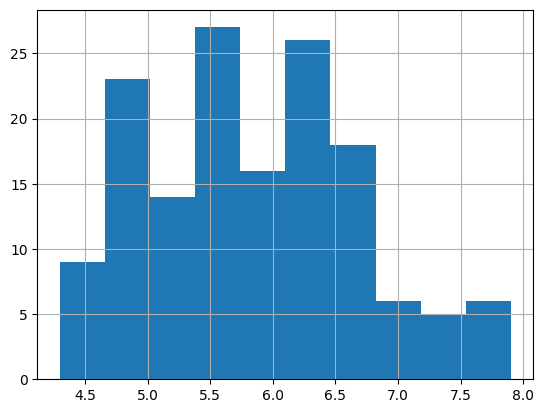

In [12]:
#data analysis

df['SepalLengthCm'].hist()

<Axes: >

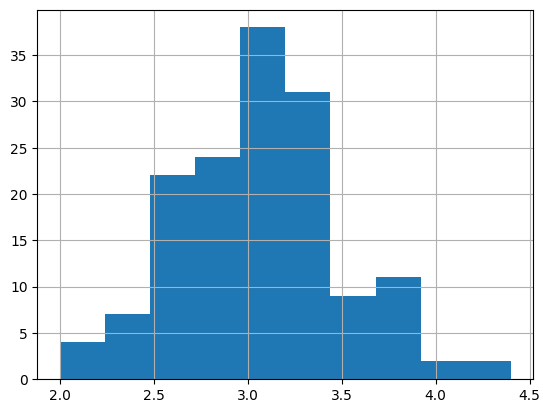

In [13]:
df['SepalWidthCm'].hist()

<Axes: >

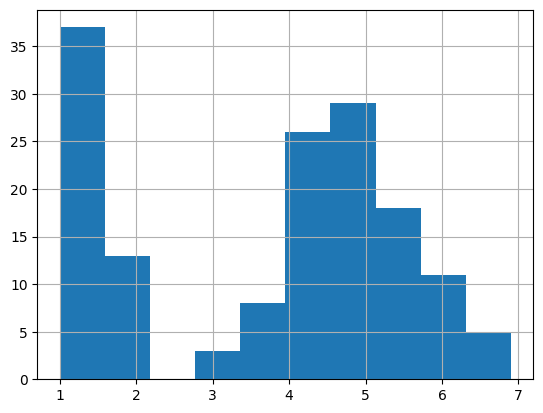

In [14]:
df['PetalLengthCm'].hist()

<Axes: >

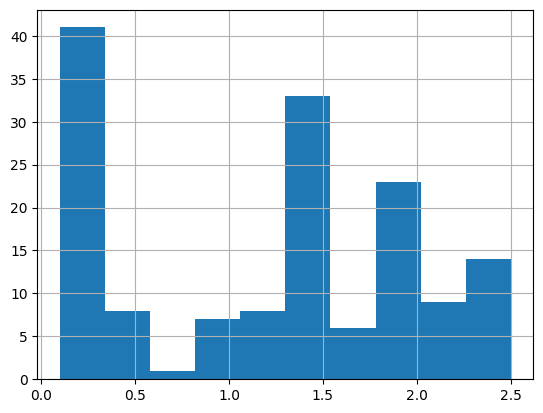

In [15]:
df['PetalWidthCm'].hist()

In [16]:
df2=df.drop(columns=['Species'])

<Axes: >

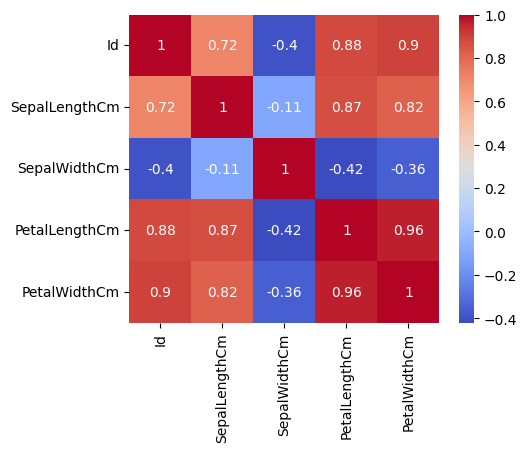

In [17]:
corr=df2.corr()

fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Taking input and output variables
x = df.drop(['Id','Species'],axis =1)
y = df['Species']


x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.30)


In [19]:
# Building and training the model
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [20]:
# Measuring Accuracy
accuracy_score(y_test,pred)

0.9777777777777777

In [21]:
#predicting with the model
sl = float(input("SepalLengthCm"))
sw = float(input("SepalWidthCm"))
pl = float(input("PetalLengthCm"))
pw = float(input("PetalWidthCm"))
resi = model.predict([[sl,sw,pl,pw]])[0]
print('Predicted Iris flower type is: ',list(resd.keys())[list(resd.values()).index(resi)].upper())

SepalLengthCm5.1
SepalWidthCm3.5
PetalLengthCm1.4
PetalWidthCm0.2
Predicted Iris flower type is:  IRIS-SETOSA
